# *Customer Churn Prediction*

> # Importing required libraries¶

In [1]:
import pandas as pd
import numpy as np

#EDA 
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

> # Load dataset

In [2]:
df =pd.read_csv('Telco_customer_churn.csv.xlsx - Telco_Churn.csv')
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


> # Exploratory Data Analysis (EDA) 

In [3]:
# Check data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [4]:
# Check missing values
df.isna().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [5]:
# check duplicated observations
df.duplicated().sum() 

0

In [6]:
# Summary Statistics
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [7]:
df.nunique()

CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Label             2
Churn Value             2
Churn Score            85
CLTV                 3438
Churn Reason           20
dtype: int64

## -  | Status 

### 1. Count , CustomerID

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


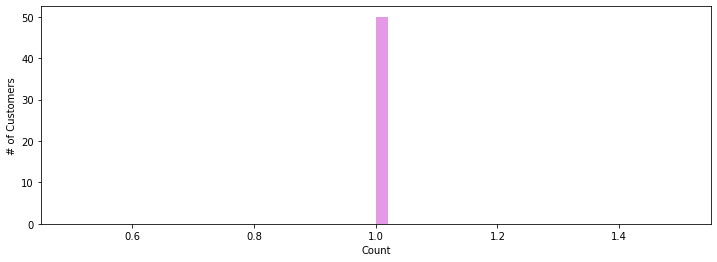

In [65]:
df['Count'].value_counts()
plt.figure(figsize=(12,4))
ax =sns.distplot(df['Count'], color="m")
ax.set_ylabel('# of Customers')
ax.set_xlabel('Count')
plt.show()

**'Count'** is used in reporting/dashboarding to sum up the number of customers in a filtered set, so it does not contribute significantly to predicting churn.

In [69]:
df['CustomerID'  ].nunique()

7043

 We do not need **'customer ID'** as it does not contribute significantly to predicting churn.

### 2. Label

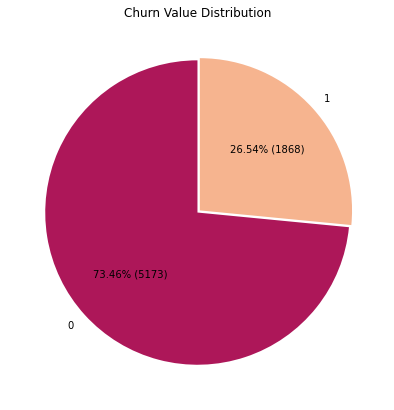

In [8]:
rocket_colors = [sns.color_palette('rocket')[2], sns.color_palette('rocket')[5]]
total_cnt = df['Churn Value'].count()
y = df["Churn Value"].value_counts()

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(y, labels=y.index, explode = (0, 0.021) ,autopct=lambda p: f'{p:.2f}% ({int(p * total_cnt / 100)})', startangle=90, colors=rocket_colors)
plt.title('Churn Value Distribution')
plt.show()


The distribution is as follows:

- **Churn Value 0:** 5174 instances
- **Churn Value 1:** 1869 instances


> **Imbalance:** The distribution indicates that there is a class imbalance, with significantly more instances labeled as "Churn Value 0" (not churned) compared to "Churn Value 1" (churned). This class imbalance is important to consider when building predictive models, as it may impact model performance and should be addressed using techniques such as resampling or adjusting class weights during model training.


In [72]:
df[['Churn Label','Churn Value','Churn Score','Churn Reason','CLTV']]

,Churn Label,Churn Value,Churn Score,Churn Reason,CLTV
0,Yes,1,86,Competitor made better offer,3239
1,Yes,1,67,Moved,2701
2,Yes,1,86,Moved,5372
3,Yes,1,84,Moved,5003
4,Yes,1,89,Competitor had better devices,5340
...,...,...,...,...,...
7038,No,0,45,NaN,5306
7039,No,0,59,NaN,2140
7040,No,0,71,NaN,5560
7041,No,0,59,NaN,2793


- We aim to identify whether a customer churns or not. The specific reasons for churn will not be considered in this analysis. Therefore, **'Churn Reason'** will be excluded during the feature selection process to streamline the model for predicting churn.

- **CLTV** is more about understanding the long-term value of a customer to the business, and it's often used for strategic decision-making rather than immediate churn prediction.  

In [80]:
df[['Churn Label','Churn Value']].duplicated(keep=False).sum() 

7043

- Both 'Churn Label' and 'Churn Value' contain identical information, representing whether a customer has churned or not.
- The values are encoded as 1 for 'Yes' and 0 for 'No'.
- To avoid redundancy, we will drop **'Churn Label'** and retain **'Churn Value'** in -Data Preparation- as the binary label for churn prediction.

## -  | Demographics

In [175]:
demographic = ['Gender', 'Senior Citizen', 'Partner', 'Dependents']

> ### Univariate Analysis


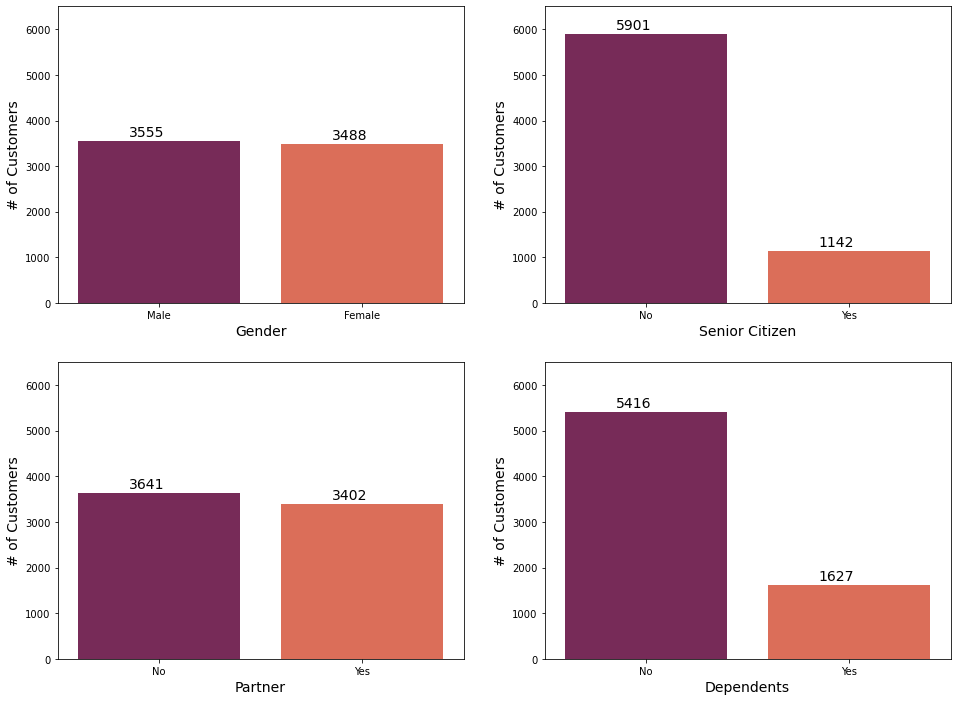

In [176]:
num_rows = 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 12))

for i, feature in enumerate(demographic):
    row = i // num_cols
    col = i % num_cols

    sns.countplot(data=df, x=feature, palette='rocket', ax=axes[row, col])

    axes[row, col].set_xlabel(feature, fontsize=14)
    axes[row, col].set_ylabel("# of Customers", fontsize=14)
    axes[row, col].set_ylim(0, 6500)

    for p in axes[row, col].patches:
        axes[row, col].annotate((p.get_height()), (p.get_x() + 0.25, p.get_height() + 100),fontsize=14)

plt.show()


From above plots, we can say the following:

- **Gender** & **Partner :** The dataset exhibits a relatively balanced representation of both genders,

- **Senior Citizen:** The majority of customers in the dataset are not senior citizens, with a smaller proportion falling into the senior citizen category.

- **Dependents:** A significant majority of customers don't have dependents, 


> ### Bivariate Analysis

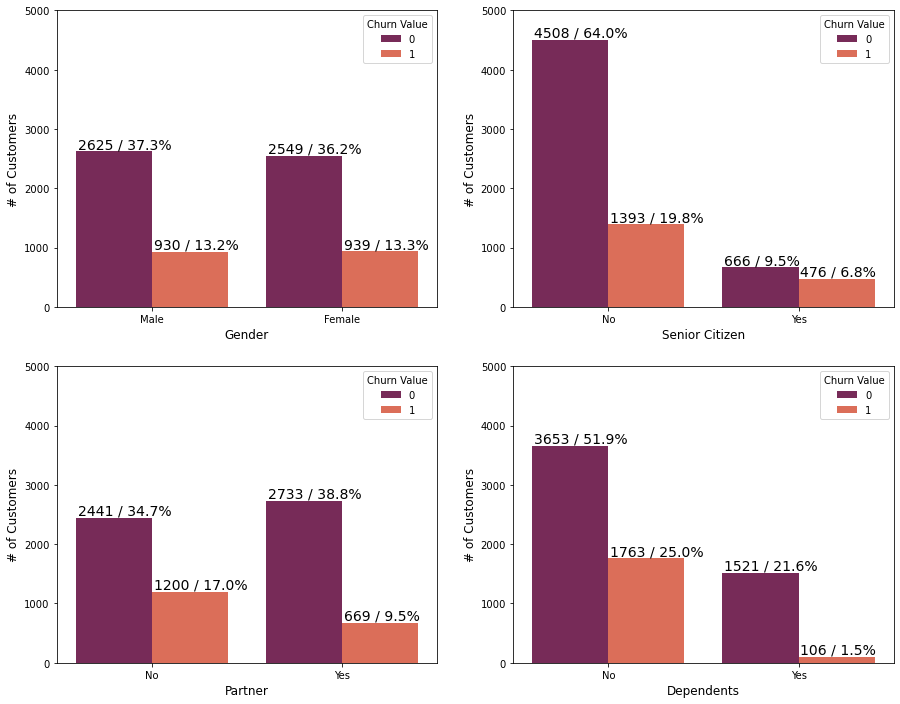

In [13]:
num_rows = 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
for i, feature in enumerate(demographic):
    row = i // num_cols
    col = i % num_cols

    sns.countplot(data=df, x=feature, hue="Churn Value", palette='rocket', ax=axes[row, col])

    axes[row, col].set_xlabel(feature, fontsize=12)
    axes[row, col].set_ylabel("# of Customers", fontsize=12)
    axes[row, col].set_ylim(0, 5000)

    total_height = 0
    for p in axes[row, col].patches:
        total_height += p.get_height()

    for p in axes[row, col].patches:
        axes[row, col].annotate(f'{p.get_height()} / {p.get_height() / total_height * 100:2.1f}%', (p.get_x() + 0.01, p.get_height() + 50),fontsize=14)
    


plt.show()


From above plots, we can say the following:

- **Gender :** The distribution of churn appears similar between genders

- **Partner :** same as gender, distribution of churn appears similar

- **Senior Citizen:** Non-senior citizens contribute significantly more than senior citizens. 

- **Dependents:** Customers without dependents have a higher count in both Churn 0 and Churn 1 compared to those with dependents. 

## - | Services

### 1.  Customer Account Information:

In [14]:
informations = ['Monthly Charges', 'Total Charges','Tenure Months','Contract', 'Paperless Billing', 'Payment Method']

In [15]:
df[informations]

,Monthly Charges,Total Charges,Tenure Months,Contract,Paperless Billing,Payment Method
0,53.85,108.15,2,Month-to-month,Yes,Mailed check
1,70.70,151.65,2,Month-to-month,Yes,Electronic check
2,99.65,820.5,8,Month-to-month,Yes,Electronic check
3,104.80,3046.05,28,Month-to-month,Yes,Electronic check
4,103.70,5036.3,49,Month-to-month,Yes,Bank transfer (automatic)
...,...,...,...,...,...,...
7038,21.15,1419.4,72,Two year,Yes,Bank transfer (automatic)
7039,84.80,1990.5,24,One year,Yes,Mailed check
7040,103.20,7362.9,72,One year,Yes,Credit card (automatic)
7041,29.60,346.45,11,Month-to-month,Yes,Electronic check


In [16]:
df[informations].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Monthly Charges    7043 non-null   float64
 1   Total Charges      7043 non-null   object 
 2   Tenure Months      7043 non-null   int64  
 3   Contract           7043 non-null   object 
 4   Paperless Billing  7043 non-null   object 
 5   Payment Method     7043 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 330.3+ KB


> ### Univariate Analysis

Text(0.5, 0, 'Monthly Charges')

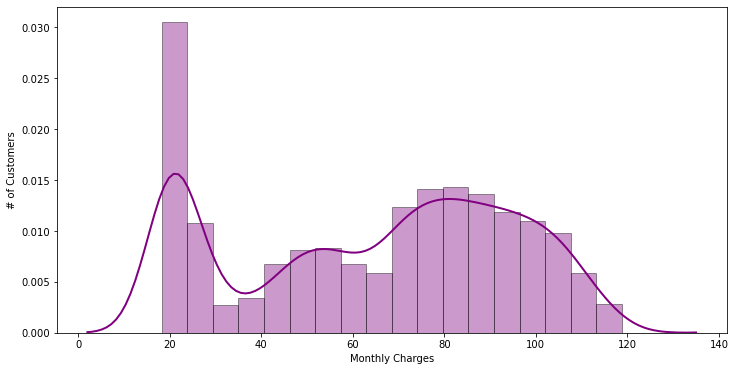

In [17]:
plt.figure(figsize=(12, 6))
ax = sns.distplot(df['Monthly Charges'], hist=True, 
              color ="purple",  
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Monthly Charges')

In [18]:
df['Total Charges'] = df['Total Charges'].replace(' ', np.nan, regex=True).astype(float)

Text(0.5, 0, 'Total Charges')

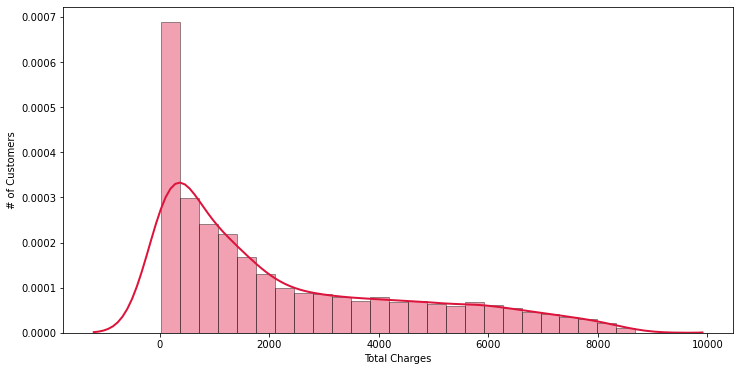

In [27]:
plt.figure(figsize=(12, 6))
ax = sns.distplot(df['Total Charges'], hist=True, 
              color ="crimson",  
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Total Charges')

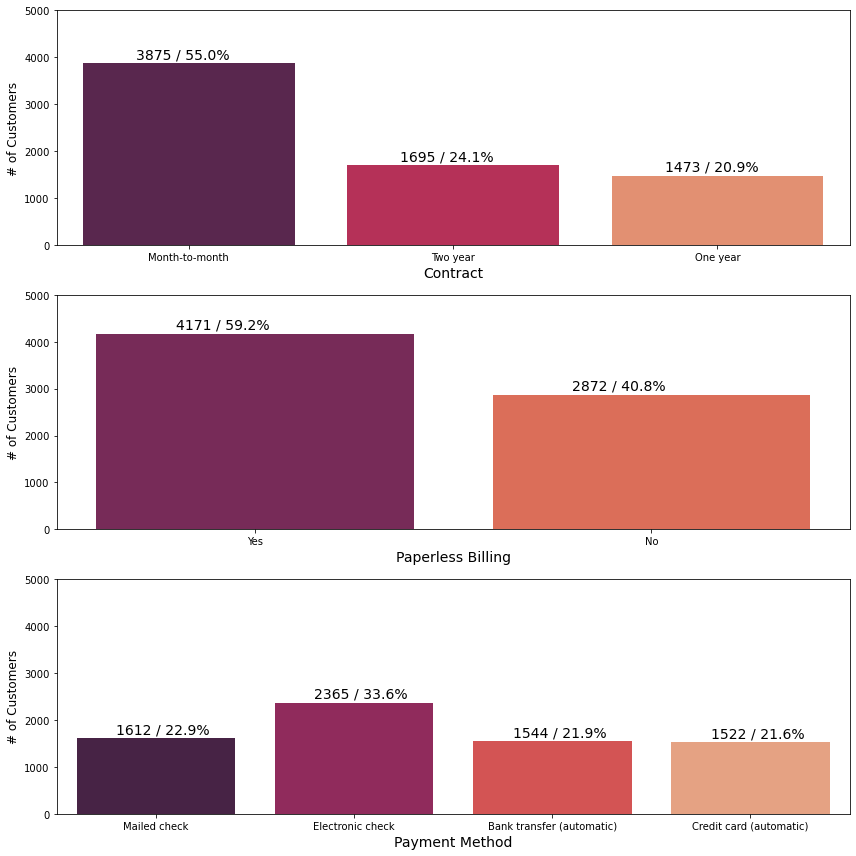

In [185]:
num_rows = 3
num_cols = 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))  # Adjust figsize as needed
for i, feature in enumerate(['Contract', 'Paperless Billing', 'Payment Method']):
    row = i  # Use i directly for rows

    sns.countplot(data=df, x=feature, palette='rocket', ax=axes[row])

    axes[row].set_xlabel(feature, fontsize=14)
    axes[row].set_ylabel("# of Customers", fontsize=12)
    axes[row].set_ylim(0, 5000)

    for p in axes[row].patches:
        axes[row].annotate(f'{p.get_height()} / {p.get_height() / total_height * 100:2.1f}%', (p.get_x()+ 0.2 , p.get_height() + 100) ,fontsize=14)

plt.tight_layout()
plt.show()


Text(0.5, 0, 'Tenure (months)')

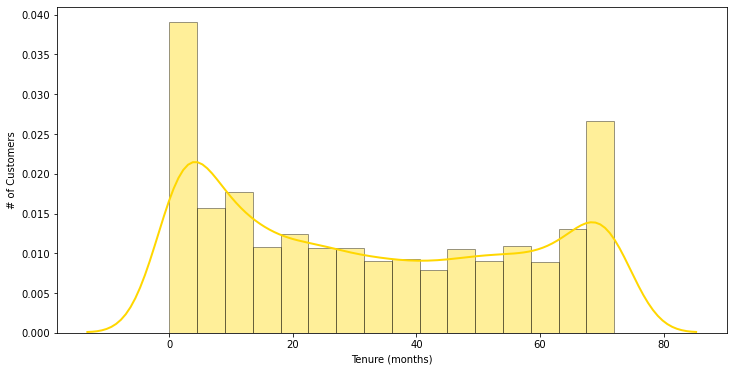

In [73]:
plt.figure(figsize=(12, 6))
ax = sns.distplot(df['Tenure Months'], hist=True, 
              color ="gold",
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')

as we can see : 

many customers have been with the telecom company for just few months, while quite a many are there for mor than two years. This could be potentially because different customers have different contracts. There may be a correlation between the  tenure months and the types of contracts, suggesting that the nature of the contract might influence customer retention. To investigate this further, we will analyze the distribution of tenure months based on different contract types.

> ### Bivariate Analysis

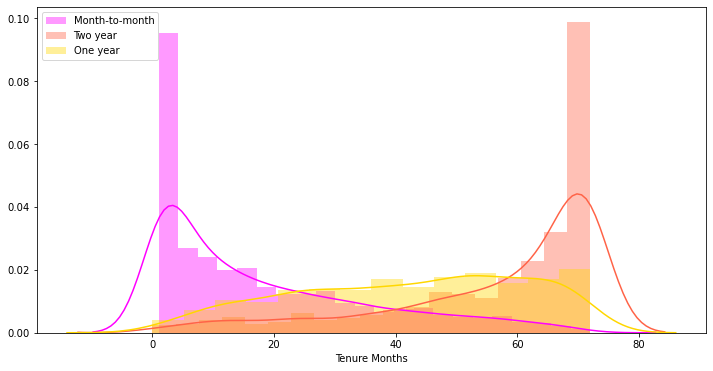

In [78]:
# tenure vs contract

plt.figure(figsize=(12, 6))

sns.distplot(df[df['Contract'] == 'Month-to-month']['Tenure Months'], color="magenta", label="Month-to-month")
sns.distplot(df[df['Contract'] == 'Two year']['Tenure Months'], color="tomato", label="Two year")
sns.distplot(df[df['Contract'] == 'One year']['Tenure Months'], color="gold", label="One year")

plt.legend()
plt.show()

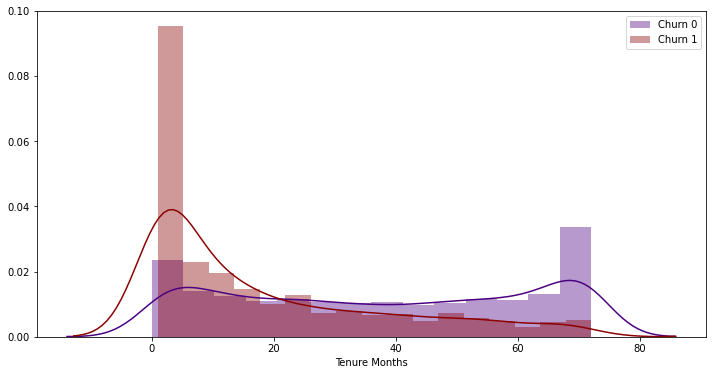

In [24]:
# tenure vs churn
plt.figure(figsize=(12, 6))

sns.distplot(df[df['Churn Value'] == 0]['Tenure Months'], color="indigo", label="Churn 0")
sns.distplot(df[df['Churn Value'] == 1]['Tenure Months'], color="darkred", label="Churn 1")

plt.legend()
plt.show()

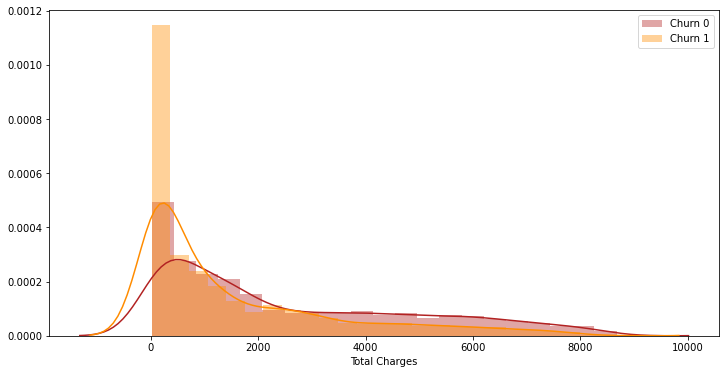

In [48]:
plt.figure(figsize=(12, 6))

sns.distplot(df[df['Churn Value'] == 0]['Total Charges'], color="firebrick", label="Churn 0")
sns.distplot(df[df['Churn Value'] == 1]['Total Charges'], color="darkorange", label="Churn 1")

plt.legend()
plt.show()

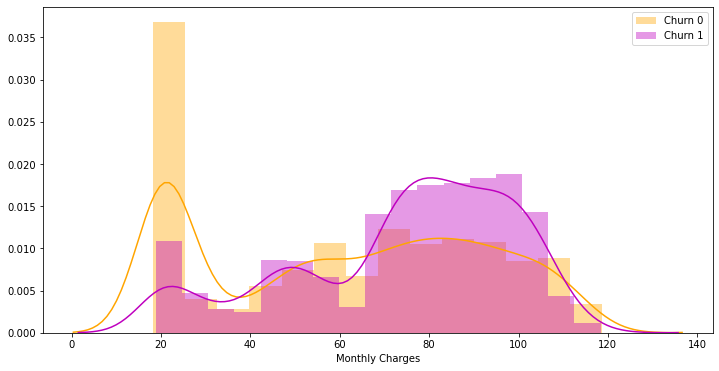

In [55]:
plt.figure(figsize=(12, 6))

sns.distplot(df[df['Churn Value'] == 0]['Monthly Charges'], color="orange", label="Churn 0")
sns.distplot(df[df['Churn Value'] == 1]['Monthly Charges'], color="m", label="Churn 1")

plt.legend()
plt.show()

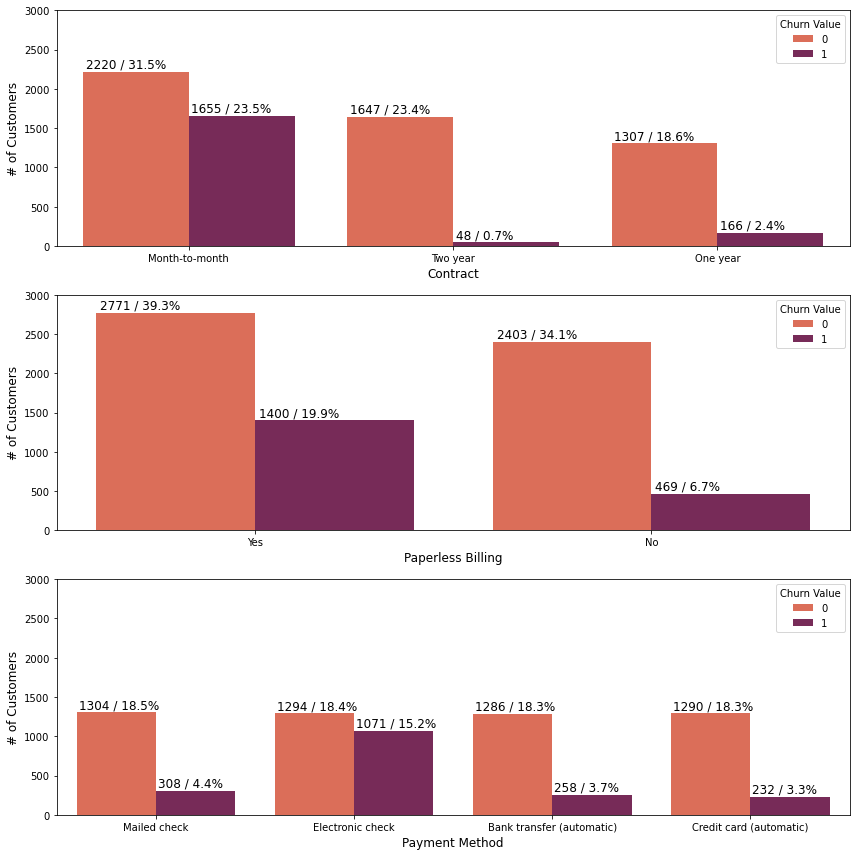

In [188]:
num_rows = 3
num_cols = 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))  # Adjust figsize as needed
for i, feature in enumerate(['Contract', 'Paperless Billing', 'Payment Method']):
    row = i  # Use i directly for rows

    sns.countplot(data=df, x=feature, hue="Churn Value", palette='rocket_r', ax=axes[row])

    axes[row].set_xlabel(feature, fontsize=12)
    axes[row].set_ylabel("# of Customers", fontsize=12)
    axes[row].set_ylim(0, 3000)

    for p in axes[row].patches:
        axes[row].annotate(f'{p.get_height()} / {p.get_height() / total_height * 100:2.1f}%', (p.get_x()+ 0.01  , p.get_height() + 50), fontsize=12)

plt.tight_layout()
plt.show()

**Overall** :

 - The distribution of churn appears quite similar between the payment methods ( 
 - As mentionned, customers with month-to-month contracts have shorter tenures and may exhibit a higher likelihood of churning (the absence of a long-term commitment). 
 - Customers with higher monthly charge fees appear to have a higher likelihood of churning.


### 2.  Customer services

In [150]:
phone_service = ['Phone Service',  'Multiple Lines',]

internet_service = ['Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies']

In [135]:
df[phone_service]

,Phone Service,Multiple Lines
0,Yes,No
1,Yes,No
2,Yes,Yes
3,Yes,Yes
4,Yes,Yes
...,...,...
7038,Yes,No
7039,Yes,Yes
7040,Yes,Yes
7041,No,No phone service


In [134]:
df[internet_service]

,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies
0,Yes,No,DSL,Yes,Yes,No,No,No,No
1,Yes,No,Fiber optic,No,No,No,No,No,No
2,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes
3,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes
4,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...
7038,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
7039,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7040,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7041,No,No phone service,DSL,Yes,No,No,No,No,No


> ### Univariate Analysis

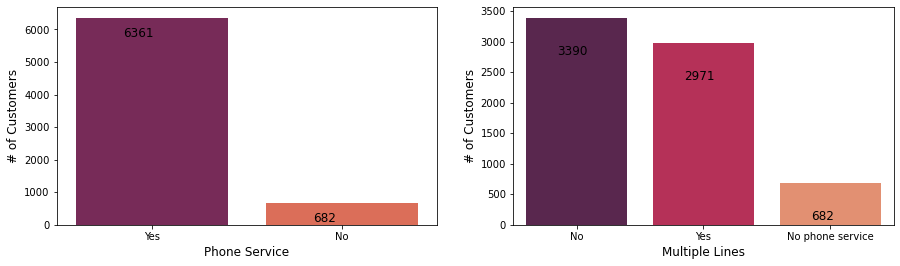

In [172]:
num_rows = 1
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4))

for i, feature in enumerate(phone_service):
    row = i // num_cols
    col = i % num_cols

    sns.countplot(data=df, x=feature, palette='rocket', ax=axes[col])

    axes[col].set_xlabel(feature, fontsize=12)
    axes[col].set_ylabel("# of Customers", fontsize=12)
    

    for p in axes[col].patches:
        axes[col].annotate((p.get_height()), (p.get_x() + 0.25, p.get_height() - 600),fontsize=12)

plt.show()


- if the customer does not have a phone service ( phone service = no ) ->  (multiple line = 'no phone service')
- if the custome has a a phone service ( phone service = 1 ) -> (multiple line = no | yes)

Therefore, the value of the 'Phone Service' column can be inferred based on the information present in the 'Multiple Lines' column. so we need to check either having a multiple line or not is important,  to decide which columns to include to our model

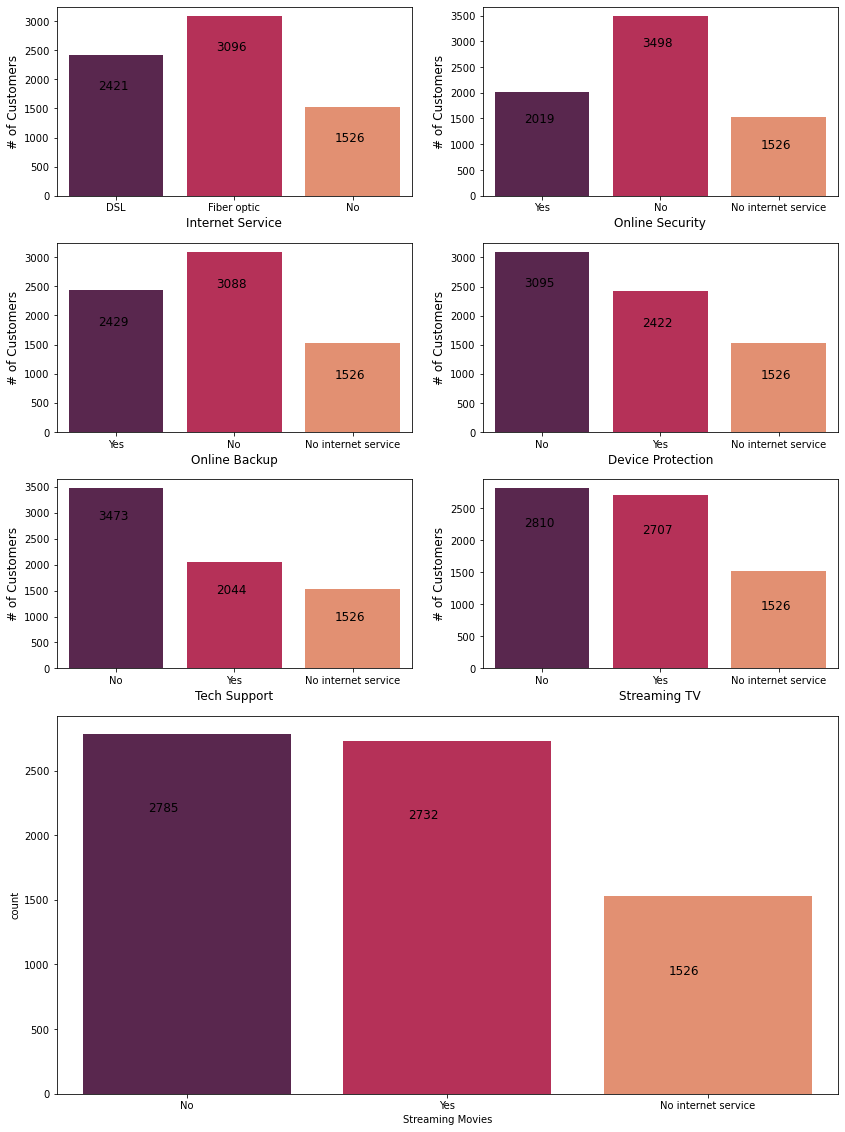

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib


num_rows = 4
num_cols = 2

fig = plt.figure(figsize=(14, 20))
gs = matplotlib.gridspec.GridSpec(num_rows, num_cols, width_ratios=[1, 1], height_ratios=[1, 1, 1, 2])

for i, feature in enumerate(internet_service[:-1]):
    row = i // num_cols
    col = i % num_cols
    
    ax = plt.subplot(gs[row, col])
    sns.countplot(data=df, x=feature, palette='rocket', ax=ax)
    
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel("# of Customers", fontsize=12)
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x() + 0.25, p.get_height() - 600), fontsize=12)

ax3 = plt.subplot(gs[3, :])
sns.countplot(data=df, x=internet_service[-1], palette='rocket', ax=ax3)
for p in ax3.patches:
    ax3.annotate((p.get_height()), (p.get_x() + 0.25, p.get_height() - 600), fontsize=12)
plt.show()


> ### Bivariate Analysis

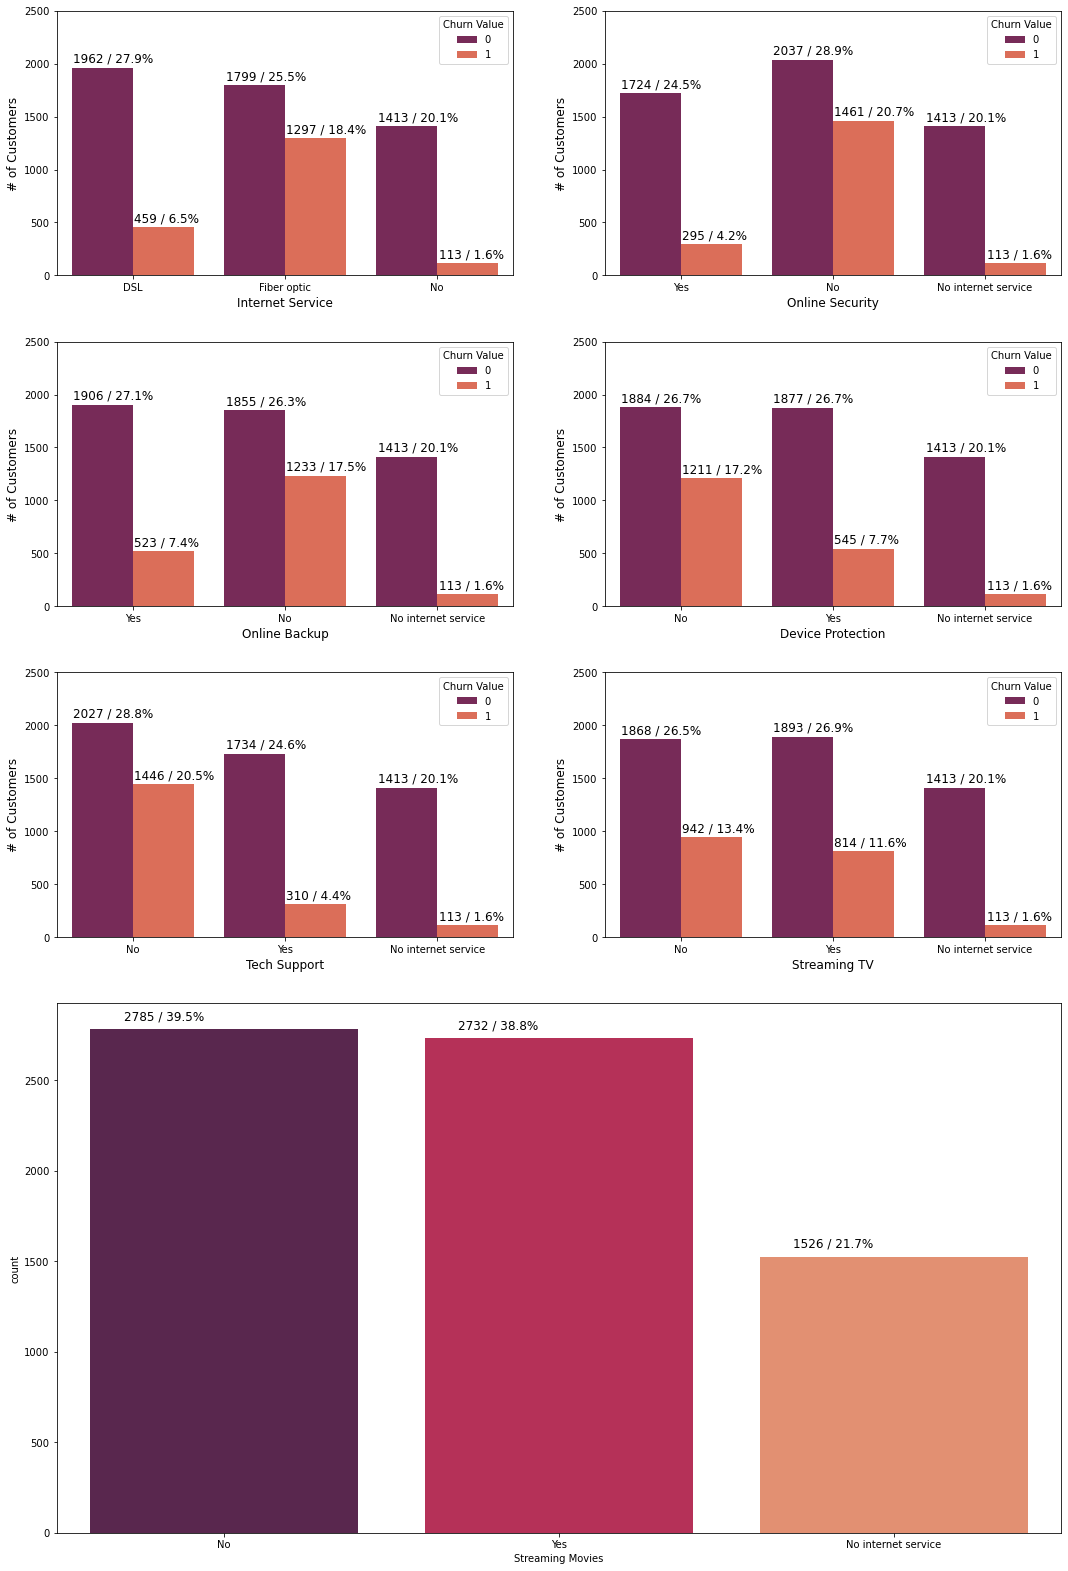

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib


num_rows = 4
num_cols = 2

fig = plt.figure(figsize=(18, 28))
gs = matplotlib.gridspec.GridSpec(num_rows, num_cols, width_ratios=[1, 1], height_ratios=[1, 1, 1, 2])

for i, feature in enumerate(internet_service[:-1]):
    row = i // num_cols
    col = i % num_cols
    
    ax = plt.subplot(gs[row, col])
    sns.countplot(data=df, x=feature,hue='Churn Value', palette='rocket', ax=ax)
    
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel("# of Customers", fontsize=12)
    ax.set_ylim(0, 2500)
    for p in ax.patches:
        ax.annotate(f'{p.get_height()} / {p.get_height() / total_height * 100:2.1f}%', (p.get_x()+ 0.01  , p.get_height() + 50), fontsize=12)

ax3 = plt.subplot(gs[3, :])
sns.countplot(data=df, x=internet_service[-1], palette='rocket', ax=ax3)
for p in ax3.patches:
    ax3.annotate(f'{p.get_height()} / {p.get_height() / total_height * 100:2.1f}%', (p.get_x()+ 0.1  , p.get_height() + 50), fontsize=12)

plt.show()


In [ ]:
df[[]]

## - | Location

### 1. Country , State , city

In [34]:
for i in ['Country', 'State', 'City']:
    
    print( '\n' ,df[i].value_counts())


 Country
United States    7043
Name: count, dtype: int64

 State
California    7043
Name: count, dtype: int64

 City
Los Angeles       305
San Diego         150
San Jose          112
Sacramento        108
San Francisco     104
                 ... 
Healdsburg          4
Jenner              4
Philo               4
Point Arena         4
Olympic Valley      4
Name: count, Length: 1129, dtype: int64


all observations in the **'Country'** and **'State'**   columns have the same value, indicating that all customers are from the United States / California. As a result, these columns may not provide meaningful variation for our churn prediction model.


### 2. 'Lat Long', 'Latitude', 'Longitude'

In [35]:
df[['Lat Long', 'Latitude', 'Longitude']]

,Lat Long,Latitude,Longitude
0,"33.964131, -118.272783",33.964131,-118.272783
1,"34.059281, -118.30742",34.059281,-118.307420
2,"34.048013, -118.293953",34.048013,-118.293953
3,"34.062125, -118.315709",34.062125,-118.315709
4,"34.039224, -118.266293",34.039224,-118.266293
...,...,...,...
7038,"34.341737, -116.539416",34.341737,-116.539416
7039,"34.667815, -117.536183",34.667815,-117.536183
7040,"34.559882, -115.637164",34.559882,-115.637164
7041,"34.1678, -116.86433",34.167800,-116.864330


In [ ]:
df.info()

In [ ]:
'Monthly Charges', 'Total Charges','Tenure Months'

> # Data Preparation:

as mentionned in eda phase so we will drop : 
   - id
   - Churn Label
   - Churn Reason
   - Count
   - Country
   - State
   

In [34]:
df.drop(['Count'], inplace = True, axis = 1)

In [19]:
df.drop(['CustomerID','Churn Label','Churn Reason','Count','Country','State'], inplace = True, axis = 1)

In [30]:
df.rename(columns={'Churn Value': 'Churn'}, inplace = True)

,Count,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
0,1,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,86,3239
1,1,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,67,2701
2,1,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1,86,5372
3,1,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,84,5003
4,1,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1,89,5340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,No,No,No,...,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,0,45,5306
7039,1,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,No,Yes,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0,59,2140
7040,1,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,No,Yes,Yes,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0,71,5560
7041,1,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,No,Yes,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,59,2793


In [ ]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [26]:
df.isna().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64